# <font color='red'>Assignment 6<font/>
    

**Implementing the SGD on Linear Regression for Boston House Price Dataset.**


**Objective:**<br>
To implement custom SGD on boston house price dataset and compare the results of custom SGD with the SKlearn SGD dataset results.

In [0]:
# Importing the required librarie
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston                 #Used to load the Boston dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import seaborn as sns


**Understanding the Dataset**

In [0]:
Boston_DS=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
print("-"*120)
print(f'Shape of the Boston dataset: {(Boston_DS.shape)}')
print("-"*120)
print(f'No of features present in the Boston dataset: {(load_boston().feature_names)}')
print("-"*120)
Boston_DS.head(2)

------------------------------------------------------------------------------------------------------------------------
Shape of the Boston dataset: (506, 13)
------------------------------------------------------------------------------------------------------------------------
No of features present in the Boston dataset: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
------------------------------------------------------------------------------------------------------------------------


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


**Segregating the target from the features**

In [0]:
Boston_DS['Price'] = load_boston().target
X_SKLN = Boston_DS.drop('Price', axis = 1)
Y_SKLN = Boston_DS['Price']

**Splitting the data into Train and Test**

In [0]:
X_SKLN_Train,X_SKLN_Test,Y_SKLN_Train,Y_SKLN_Test = train_test_split(X_SKLN,Y_SKLN,test_size =0.33,random_state=42)
print(X_SKLN_Train.shape)
print(X_SKLN_Test.shape)
print(Y_SKLN_Train.shape)
print(Y_SKLN_Test.shape)
X_SKLN_Train.mean()

(339, 13)
(167, 13)
(339,)
(167,)


CRIM         3.351324
ZN          11.716814
INDUS       11.261858
CHAS         0.076696
NOX          0.557498
RM           6.327324
AGE         68.940118
DIS          3.762468
RAD          9.483776
TAX        409.132743
PTRATIO     18.261652
B          358.431475
LSTAT       12.497611
dtype: float64

**Standardizating the Data**

In [0]:
std = StandardScaler()
X_SKLN_Train = std.fit_transform(X_SKLN_Train)
X_SKLN_Test = std.transform(X_SKLN_Test)
SKLN_SGD_RG = SGDRegressor()
SKLN_SGD_RG.fit(X_SKLN_Train, Y_SKLN_Train)
Y_SKLN_PRD = SKLN_SGD_RG.predict(X_SKLN_Test)
SkLearn_w=SKLN_SGD_RG.coef_
print(f"Sklearn's SGD regressor Coefficients:{(SKLN_SGD_RG.coef_)}")
print(f"Sklearn's SGD regressor Y Intercept:{(SKLN_SGD_RG.intercept_)}")

Sklearn's SGD regressor Coefficients:[-0.89378768  0.71539225  0.14751301  0.89272288 -1.67100139  2.85790581
 -0.41028437 -2.85475367  1.32968721 -0.67137791 -2.01879448  1.04490366
 -3.92669325]
Sklearn's SGD regressor Y Intercept:[22.97865716]


**Implementing the own SGD Regressor for Linear Regression**

In [0]:
OWN_Boston_DS = load_boston()
OWN_Boston_DS.data.shape
OWN_Boston_DS.feature_names
OWN_Boston_DS.target.shape
OWN_Boston_DS_data = pd.DataFrame(OWN_Boston_DS.data, columns = OWN_Boston_DS.feature_names)
print(OWN_Boston_DS_data.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


**Normalizing the data**

In [0]:
mean= OWN_Boston_DS_data.mean()
std= OWN_Boston_DS_data.std()
OWN_Boston_DS_data = (OWN_Boston_DS_data - mean)/std
print(OWN_Boston_DS_data.head())

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.419367  0.284548 -1.286636  ... -1.457558  0.440616 -1.074499
1 -0.416927 -0.487240 -0.592794  ... -0.302794  0.440616 -0.491953
2 -0.416929 -0.487240 -0.592794  ... -0.302794  0.396035 -1.207532
3 -0.416338 -0.487240 -1.305586  ...  0.112920  0.415751 -1.360171
4 -0.412074 -0.487240 -1.305586  ...  0.112920  0.440616 -1.025487

[5 rows x 13 columns]


In [0]:
OWN_Boston_DS_data["Price"] = OWN_Boston_DS.target
OWN_Boston_DS_data.head()
OWN_Boston_Y = OWN_Boston_DS_data["Price"]
OWN_Boston_X = OWN_Boston_DS_data.drop("Price", axis = 1)
OWN_Train_X,OWN_Test_X,OWN_Train_Y,OWN_Test_Y=train_test_split(OWN_Boston_X,OWN_Boston_Y,test_size=0.33,random_state=42)
print(OWN_Train_X.shape,OWN_Train_Y.shape,OWN_Test_X.shape,OWN_Test_Y.shape)
OWN_Train_X["Price"] = OWN_Train_Y
x_sh=OWN_Train_X.shape[1]-1

(339, 13) (339,) (167, 13) (167,)


**Comparing the price with the each features in the data**

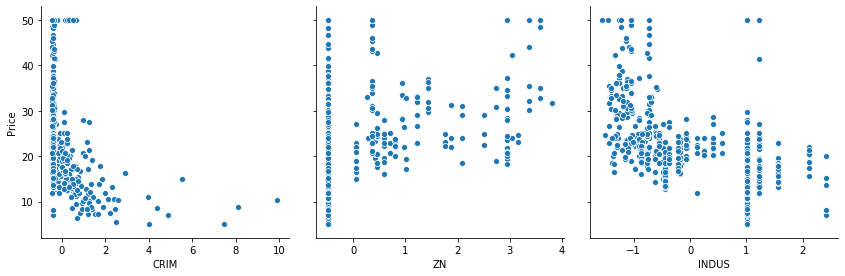

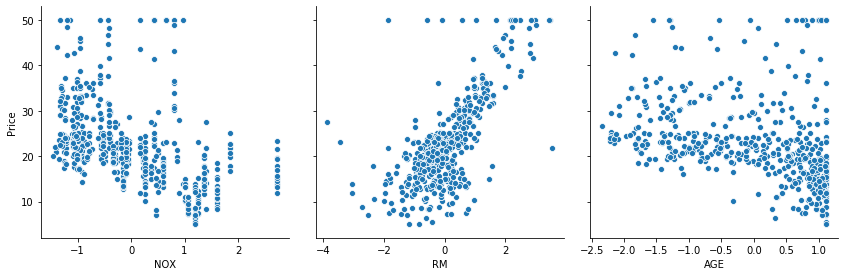

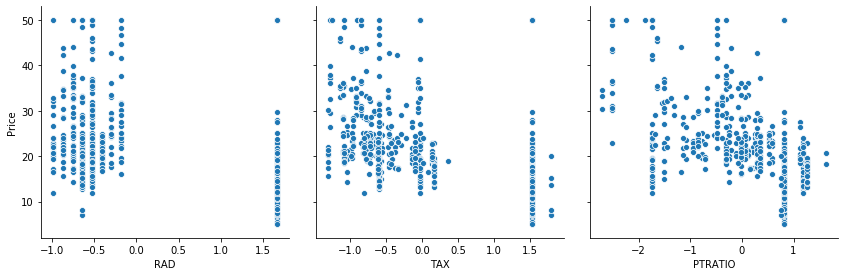

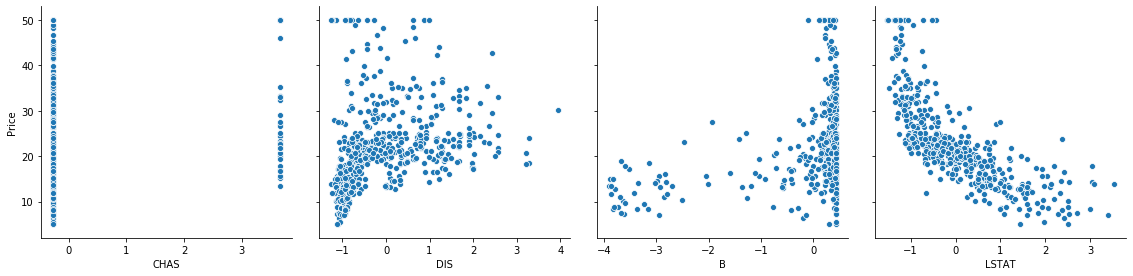

In [0]:
#https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h
plt.close();
Plot1 = sns.pairplot(data=OWN_Boston_DS_data,height=4,
                  y_vars=['Price'],
                  x_vars=['CRIM', 'ZN', 'INDUS'])
Plot2 = sns.pairplot(data=OWN_Boston_DS_data,height=4,
                  y_vars=['Price'],
                  x_vars=['NOX', 'RM', 'AGE'])
Plot3 = sns.pairplot(data=OWN_Boston_DS_data,height=4,
                  y_vars=['Price'],
                  x_vars=['RAD', 'TAX', 'PTRATIO'])
Plot4 = sns.pairplot(data=OWN_Boston_DS_data,height=4,
                  y_vars=['Price'],
                  x_vars=['CHAS', 'DIS', 'B', 'LSTAT'])

<font color='blue'>**OBSERVATION:**<br>
1.The prices increase as the value of RM increases linearly.Also we can see few outliers<br>
2.The prices tend to decrease with an increase in LSTAT.<br>
3.CRIM rate seems to be high at the place of price ranges from 10 to 30.<br>

In [0]:
print(OWN_Boston_DS_data.head(5))

       CRIM        ZN     INDUS      CHAS  ...   PTRATIO         B     LSTAT  Price
0 -0.419367  0.284548 -1.286636 -0.272329  ... -1.457558  0.440616 -1.074499   24.0
1 -0.416927 -0.487240 -0.592794 -0.272329  ... -0.302794  0.440616 -0.491953   21.6
2 -0.416929 -0.487240 -0.592794 -0.272329  ... -0.302794  0.396035 -1.207532   34.7
3 -0.416338 -0.487240 -1.305586 -0.272329  ...  0.112920  0.415751 -1.360171   33.4
4 -0.412074 -0.487240 -1.305586 -0.272329  ...  0.112920  0.440616 -1.025487   36.2

[5 rows x 14 columns]


In [0]:
#https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/
def Loss_Function(intr_DS,weig_DS,X_DS,Y_DS):
    loss = 0
    for i in range(0, len(X_DS)):
        Exp1=Y_DS[:,i] - (np.dot(X_DS[i] , weig_DS) + intr_DS) 
        loss += (Exp1) ** 2                                   
    return loss/len(X_DS)                                     


<font color='blue'>**OBSERVATION:**<br>
The loss funcation is calculated based on the below formula<br>
$$\sum_{i=1}^K[y[i]-x[i].w^T+b]$$<br>
Where W= Weight and b=Intercept<br></font>

In [0]:
# https://stackoverflow.com/questions/50328545/stochastic-gradient-descent-for-linear-regression-on-partial-derivatives

def Own_regressor(weig, intr, Full_DS, X1, Y1, LR):

    """Implementation of own SGD Gradient Descent for Linear regression"""

    Weig_deriv=0
    Intr_deriv=0
    Iterations=1000                              
    loss_Train=[]
    loss_Test=[]
    j=0
    while j < 1000:
        Full_DS_Batch=Full_DS.sample(100)     
        x = np.asmatrix(Full_DS_Batch.drop("Price", axis = 1))
        y = np.asmatrix(Full_DS_Batch["Price"])
        for i in range(len(x)):
            tmp=y[:,i]-np.dot(x[i],weig)+intr  
            Weig_deriv+=np.dot(-2*x[i].T,tmp)    
            Intr_deriv+=(-2*tmp)                 
        weig_update=weig-(LR*Weig_deriv)                       
        b_update=intr-(LR*Intr_deriv)                       
        if (weig==weig_update).all():                 
            break                         
        else:
            weig=weig_update                          
            intr=b_update                          
            LR=LR/2                          
        # Evaluating the loss in the custom built SGD regressor of train data
        loss_TR=Loss_Function(intr,weig,x,y)
        loss_Train.append(loss_TR)
        # Evaluating the loss in the custom built SGD regressor of test data
        loss_TS=Loss_Function(intr,weig,np.asmatrix(X1),np.asmatrix(Y1))
        loss_Test.append(loss_TS)
        j=j+1
    return weig,intr,loss_Train,loss_Test

<font color='blue'>**OBSERVATION:**<br>
1.At initial, keeping the Weight and Intercept values as zero <br>
2.Setting up the iteration value<br>
3.Settingup the batch of datasize<br>
4.Calculating the $$\frac{\partial \mathbf{L}}{\partial \mathbf{w}} and\frac{\partial \mathbf{L}}{\partial \mathbf{b}}$$
Where W= Weight and b=Intercept<br>
$$\frac{\partial \mathbf{L}}{\partial \mathbf{w}} = \sum_{i=1}^K [(-2.xi)(yi-(xi.w^T)+b)]$$
$$\frac{\partial \mathbf{L}}{\partial \mathbf{b}} = \sum_{i=1}^K [(-2)(yi-(xi.w^T)+b)]$$
5.At each iteration learning rate is reduced by half.<br>
6.And the loop was keep executing till the weight get saturated.<br>
7.At some point weight gets saturated. Finding that point and taking its previous value.<br>
</font>

SGD Coefficient: [[ 2.58298431e-01]
 [ 3.39221477e-01]
 [-7.37036275e-01]
 [ 1.06994685e+00]
 [-4.42579777e-02]
 [ 4.87969387e+00]
 [ 8.78820383e-01]
 [-7.40355353e-01]
 [ 4.58860351e-01]
 [-7.82629557e-04]
 [-2.52489286e+00]
 [ 9.83409962e-01]
 [-3.01768581e+00]]
Y_Intercept: [[22.35480459]]
Train Loss = [matrix([[370.20906386]]), matrix([[206.28317897]]), matrix([[107.22916446]]), matrix([[63.09551347]]), matrix([[46.62212318]]), matrix([[44.68280846]]), matrix([[19.99057045]]), matrix([[28.32658378]]), matrix([[23.63833973]]), matrix([[19.31282885]]), matrix([[32.69288678]]), matrix([[37.32332292]]), matrix([[45.33978117]]), matrix([[27.19064905]]), matrix([[30.54485685]]), matrix([[31.40479638]]), matrix([[22.16166989]]), matrix([[23.80463751]]), matrix([[28.07904338]]), matrix([[27.64880512]]), matrix([[28.02435142]]), matrix([[23.37228194]]), matrix([[26.39519442]]), matrix([[35.32755431]]), matrix([[30.71488946]]), matrix([[41.37173085]]), matrix([[36.56274588]]), matrix([[27.86

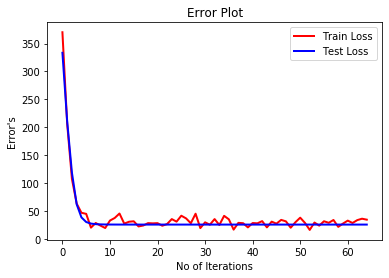

In [0]:
#https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
lr = 0.001                    
# Choosing random values for w and b
intercept = np.random.rand()
wgt = np.random.rand(x_sh)
bias = np.asmatrix(wgt).T   #Transpose of weight matrix
weig_, intr_, loss_Train_, loss_Test_ = Own_regressor(bias, intercept, OWN_Train_X, OWN_Test_X, OWN_Test_Y, lr)
print(f"SGD Coefficient: {(weig_)}")
print(f"Y_Intercept: {(intr_)}")

print(f"Train Loss = {(loss_Train_)}")
print(f"Test Loss= {(loss_Test_)} ")

OWN_Prediction=(np.dot(np.asmatrix(OWN_Test_X), weig_) + intr_) 
OWN_Prediction_List=np.array(OWN_Prediction).T[0]              
# Error Plot
plt.close();
plt.figure()
plt.plot(range(len(loss_Train_)), np.reshape(loss_Train_,[len(loss_Train_), 1]), label = "Train Loss",c='red', ls='-',lw=2)
plt.plot(range(len(loss_Test_)), np.reshape(loss_Test_, [len(loss_Test_), 1]), label = "Test Loss",c='blue', ls='-',lw=2)
plt.title("Error Plot")
plt.xlabel("No of Iterations")
plt.ylabel("Error's")
plt.legend()
plt.show()

<font color='blue'>**OBSERVATION:**<br>
When learning rate is set to 0.1 and 0.01the model perform very bad<br>
</font>

**Comparing the sklearn's SGD Regressor and Own implementation of SGDreg using the scatter plot**

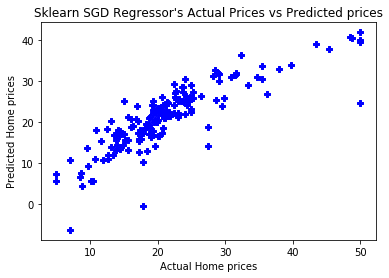

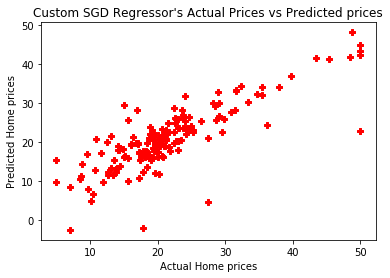

In [0]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Applying skLearn SGD Regressor.
plt.close();
plt.figure(1)
plt.subplot(111)
plt.scatter(Y_SKLN_Test, Y_SKLN_PRD,marker='P',c='blue')
plt.xlabel("Actual Home prices")
plt.ylabel("Predicted Home prices")
plt.title("Sklearn SGD Regressor's Actual Prices vs Predicted prices")
plt.show()

# Applying own SGD Regressor
plt.close();
plt.figure(2)
plt.subplot(111)
plt.scatter([OWN_Test_Y], [(np.dot(np.asmatrix(OWN_Test_X), weig_) + intr_)],marker='P',c='red')
plt.xlabel("Actual Home prices")
plt.ylabel("Predicted Home prices")
plt.title("Custom SGD Regressor's Actual Prices vs Predicted prices")
plt.show()

In [0]:
# Sklearn SGD Regression
print(f"MSE of Sk learn's prediction:{(mean_squared_error(Y_SKLN_Test, Y_SKLN_PRD))}")
print(f"r2_score of Sk learn's prediction:{(r2_score(Y_SKLN_Test, Y_SKLN_PRD))}")

MSE of Sk learn's prediction:21.228706973845743
r2_score of Sk learn's prediction:0.7194883008348725


In [0]:
# https://stackoverflow.com/questions/40901445/function-to-calculate-r2-r-squared-in-r
#import math 
OWN_loss = Loss_Function(intr_, weig_, np.asmatrix(OWN_Test_X), np.asmatrix(OWN_Test_Y))
print(f"MSE of own SGD_reg :{(float(OWN_loss))}")

X1=np.asmatrix(OWN_Test_X)
Y1=np.asmatrix(OWN_Test_Y)
for i in range(0, len(X1)):
    Avg_Y = np.mean(Y1)                         
    Exp2=(Y1[:,i] - Avg_Y)                     
    Exp3=(Y1[:,i] - (np.dot(X1[i], weig_) + intr_))  
    Sum_of_squares = sum((Exp2)**2)                       
    Residual_sum = sum((Exp3)**2)                       
    R_Square = 1-(Residual_sum/Sum_of_squares)                        
    
print(f"r2_score of own SGDreg :{(float(R_Square))}")

MSE of own SGD_reg :25.476540352979335
r2_score of own SGDreg :0.9992409296653334


<font color='blue'>**OBSERVATION:**<br>
Calculating the r sqaure from the below formula<br>
Where 
$$r^2 = 1 - \frac{Residual\\Sum\\of\\squares}{Sum\\of\\squares}$$
</font>

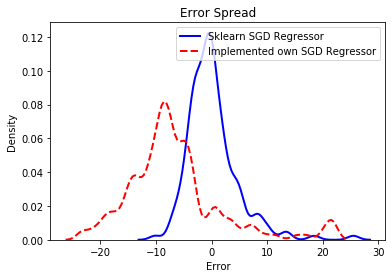

In [0]:
# Error distribution
OWN_Loss_Y = np.asmatrix(OWN_Test_Y) - (OWN_Prediction)
SKLN_Loss_Y = Y_SKLN_Test - Y_SKLN_PRD

sns.kdeplot(np.array(SKLN_Loss_Y), label = "Sklearn SGD Regressor", bw =1,c='blue', ls='-',lw=2)
sns.kdeplot(np.asarray(OWN_Loss_Y)[0], label = "Implemented own SGD Regressor", bw =1,c='red', ls='--',lw=2)
plt.title("Error Spread")
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

<font color='blue'>**OBSERVATION:**<br>
From above plot SKLearn SGD is working better than custom implementation regressor. Because the over all distribution of SKlearn with respectiv error is low.<br>


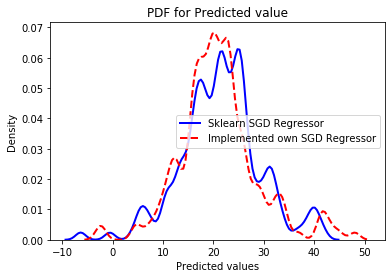

In [0]:
# Predicted value distribution
sns.kdeplot(Y_SKLN_PRD, label = "Sklearn SGD Regressor", bw =1,c='blue', ls='-',lw=2)
sns.kdeplot(OWN_Prediction_List, label = "Implemented own SGD Regressor", bw =1,c='red', ls='--',lw=2)
plt.title("PDF for Predicted value")
plt.xlabel("Predicted values")
plt.ylabel("Density")
plt.show()

<font color='blue'>**OBSERVATION:**<br>
From above plot you can see the most of the predicted values are overlap.<br>


**Comparison with Pretty Table**

In [0]:
PT = PrettyTable()
PT.field_names=['S.No','Custom SGD Regressor','SkLearn SGD Regressor']
for i in range(x_sh):
    PT.add_row([i+1,float(weig_[i]),SkLearn_w[i]])
print(PT)

+------+------------------------+-----------------------+
| S.No |  Custom SGD Regressor  | SkLearn SGD Regressor |
+------+------------------------+-----------------------+
|  1   |   0.2582984312172637   |  -0.8937876809095562  |
|  2   |   0.3392214765870696   |   0.7153922469815946  |
|  3   |  -0.7370362747081937   |  0.14751301403165415  |
|  4   |   1.0699468487113792   |   0.8927228844675043  |
|  5   |  -0.04425797767794621  |  -1.6710013907984682  |
|  6   |   4.8796938688994365   |   2.8579058082668083  |
|  7   |    0.87882038297057    |  -0.4102843692600765  |
|  8   |  -0.7403553528758017   |   -2.854753671182647  |
|  9   |  0.45886035113737783   |   1.3296872106166655  |
|  10  | -0.0007826295570831534 |  -0.6713779089268122  |
|  11  |  -2.5248928602744205   |  -2.0187944797150936  |
|  12  |   0.983409961680586    |   1.044903661065243   |
|  13  |  -3.0176858146709526   |  -3.9266932523379334  |
+------+------------------------+-----------------------+


<font color='green'>**SUMMARY:**<br>
Overall when we compare the custom implemeneted SGD regressor with the SKlearn SGD regressor they are working little similar.<br>
But still we can see the Sklearn SGD regressor model is performing good when we consider the MSE and r square values.<br>
Hence i conclude the Sklearn SGD regressor model have better performance when ccompare to the custom SGD regressor.<br>



**REFERENCE:**<br>
*To create a mathematical equations in the Jupyter Notebook*<br>
https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/<br>
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html<br>
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html<br>